In [1]:
import math
import pandas_datareader as web
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

/usr/local/lib/python3.6/dist-packages/pandas_datareader/compat/__init__.py:7: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  from pandas.util.testing import assert_frame_equal
Using TensorFlow backend.


In [39]:
df = web.DataReader('UBER', data_source='yahoo', start='2012-01-01', end='2020-03-14')
#Show the data
df

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2019-05-10,45.000000,41.060001,42.000000,41.570000,186322500,41.570000
2019-05-13,39.240002,36.080002,38.790001,37.099998,79442400,37.099998
2019-05-14,39.959999,36.849998,38.310001,39.959999,46661100,39.959999
2019-05-15,41.880001,38.950001,39.369999,41.290001,36086100,41.290001
2019-05-16,44.060001,41.250000,41.480000,43.000000,38115500,43.000000
...,...,...,...,...,...,...
2020-03-09,30.320000,28.150000,28.500000,28.170000,37439200,28.170000
2020-03-10,29.860001,27.000000,29.469999,28.969999,36308300,28.969999
2020-03-11,28.139999,25.610001,27.910000,26.240000,43067800,26.240000


In [40]:
df.shape


(213, 6)

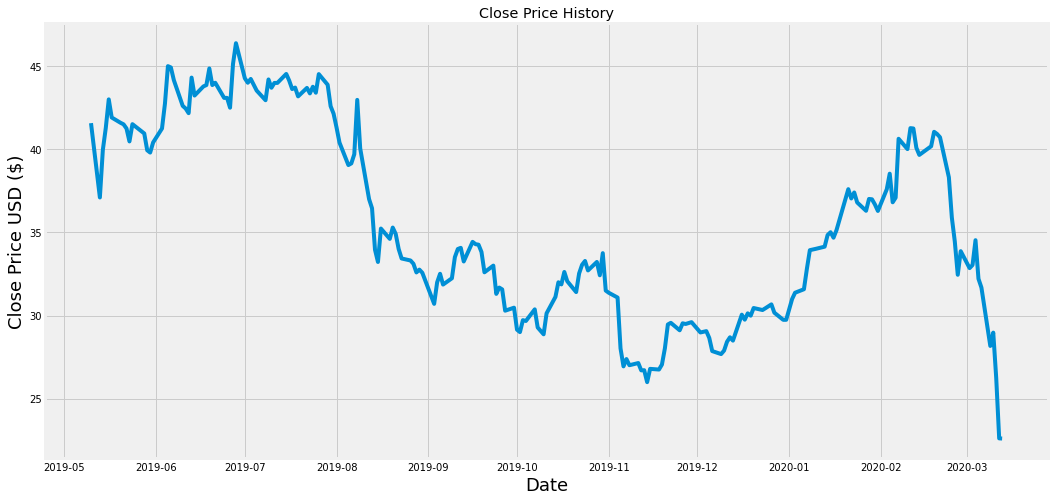

In [41]:
plt.figure(figsize=(16,8))
plt.title('Close Price History')
plt.plot(df['Close'])
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.show()

In [42]:
#Create a new dataframe with only the 'Close column
data = df.filter(['Close'])
#Convert the dataframe to a numpy array
dataset = data.values
#Get the number of rows to train the model on
training_data_len = math.ceil( len(dataset) * .8 )

training_data_len

171

In [43]:
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)

scaled_data

array([[7.97729132e-01],
       [6.09756000e-01],
       [7.30025156e-01],
       [7.85954583e-01],
       [8.57863710e-01],
       [8.12026867e-01],
       [7.98570194e-01],
       [7.94785495e-01],
       [7.84272459e-01],
       [7.51471839e-01],
       [7.95205946e-01],
       [7.71656848e-01],
       [7.29184094e-01],
       [7.23296819e-01],
       [7.48948652e-01],
       [7.84272459e-01],
       [8.47350674e-01],
       [9.41967997e-01],
       [9.38603749e-01],
       [9.06644190e-01],
       [8.41463400e-01],
       [8.34735063e-01],
       [8.22960354e-01],
       [9.12952076e-01],
       [8.67535684e-01],
       [8.90664331e-01],
       [8.94028579e-01],
       [9.36080723e-01],
       [8.94028579e-01],
       [8.99915854e-01],
       [8.61648410e-01],
       [8.61648410e-01],
       [8.36837639e-01],
       [9.47434821e-01],
       [1.00000000e+00],
       [9.11269952e-01],
       [8.99915854e-01],
       [9.09587827e-01],
       [8.80151295e-01],
       [8.55761135e-01],


In [44]:
#Create the training data set
#Create the scaled training data set
train_data = scaled_data[0:training_data_len , :]
#Split the data into x_train and y_train data sets
x_train = []
y_train = []

for i in range(60, len(train_data)):
  x_train.append(train_data[i-60:i, 0])
  y_train.append(train_data[i, 0])
  if i<= 61:
    print(x_train)
    print(y_train)
    print()

[array([0.79772913, 0.609756  , 0.73002516, 0.78595458, 0.85786371,
       0.81202687, 0.79857019, 0.7947855 , 0.78427246, 0.75147184,
       0.79520595, 0.77165685, 0.72918409, 0.72329682, 0.74894865,
       0.78427246, 0.84735067, 0.941968  , 0.93860375, 0.90664419,
       0.8414634 , 0.83473506, 0.82296035, 0.91295208, 0.86753568,
       0.89066433, 0.89402858, 0.93608072, 0.89402858, 0.89991585,
       0.86164841, 0.86164841, 0.83683764, 0.94743482, 1.        ,
       0.91126995, 0.89991585, 0.90958783, 0.88015129, 0.85576114,
       0.90832631, 0.88730024, 0.8994954 , 0.8994954 , 0.92220344,
       0.90538268, 0.88393599, 0.88772069, 0.86543311, 0.88687963,
       0.87300251, 0.88982327, 0.87468463, 0.92178299, 0.89486964,
       0.84062234, 0.82169884, 0.78679565, 0.7485282 , 0.69175771])]
[0.695963022141686]

[array([0.79772913, 0.609756  , 0.73002516, 0.78595458, 0.85786371,
       0.81202687, 0.79857019, 0.7947855 , 0.78427246, 0.75147184,
       0.79520595, 0.77165685, 0.7291

In [0]:
#Convert the x_train and y_train to numpy arrays 
x_train, y_train = np.array(x_train), np.array(y_train)

In [46]:
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
x_train.shape

(111, 60, 1)

In [0]:
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape= (x_train.shape[1], 1)))
model.add(LSTM(50, return_sequences= False))
model.add(Dense(25))
model.add(Dense(1))

In [0]:
model.compile(optimizer='adam', loss='mean_squared_error')

In [49]:
model.fit(x_train, y_train, batch_size=1, epochs=1)

Epoch 1/1
111/111 [==============================] - 5s 46ms/step - loss: 0.0154


In [0]:
#Create the testing data set
#Create a new array containing scaled values from index 1543 to 2002 
test_data = scaled_data[training_data_len - 60: , :]
#Create the data sets x_test and y_test
x_test = []
y_test = dataset[training_data_len:, :]
for i in range(60, len(test_data)):
  x_test.append(test_data[i-60:i, 0])

In [0]:
x_test = np.array(x_test)

In [0]:
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1 ))

In [0]:
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

In [55]:
rmse=np.sqrt(np.mean(((predictions- y_test)**2)))
rmse

5.110201833018764

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


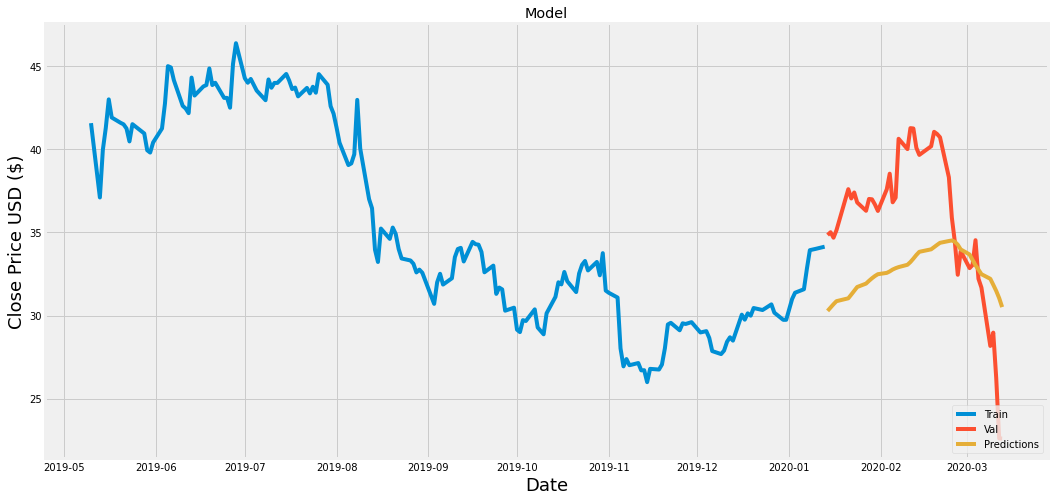

In [56]:
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions
#Visualize the data
plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
plt.show()